In [93]:
# Creating a test notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# movies.csv taken from FiveThirtyEight's GitHub
movies_df = pd.read_csv('movies.csv')

def convert(x):
    if x == 'nowomen':
        return 0
    if x == 'notalk':
        return 1
    if x == 'men':
        return 2
    if x == 'dubious' or 'men':
        return 3

movies_df['clean_test'] = movies_df['clean_test'].apply(convert)

movies_df.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,1,FAIL,13000000,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
1,2012,tt1343727,Dredd 3D,ok-disagree,3,PASS,45000000,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 Years a Slave,notalk-disagree,1,FAIL,20000000,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 Guns,notalk,1,FAIL,61000000,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,2,FAIL,40000000,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1


In [ ]:

# NOTE TO SELF: THERE'S GOTTA BE A BETTER WAY OF WRITING THIS.
def group(x):
    if x in range(1970, 1975):
        return 1
    elif x in range(1975, 1980):
        return 2
    elif x in range(1980, 1985):
        return 3
    elif x in range(1985, 1990):
        return 4
    elif x in range(1990, 1995):
        return 5
    elif x in range(1995, 2000):
        return 6
    elif x in range(2000, 2005):
        return 7
    elif x in range(2005, 2010):
        return 8
    elif x in range(2010, 2015):
        return 9

movies_df['bucket'] = movies_df['year'].apply(group)
movies_df[['year', 'bucket']]

In [27]:
# Note, crosstab is not an attribute. It is a function. It must be called.
movies_xt = pd.crosstab(movies_df['bucket'], movies_df['clean_test'])
movies_xt

clean_test,0,1,2,3
bucket,,,,
1,0,13,3,5
2,4,14,4,11
3,10,16,10,22
4,7,21,9,30
5,13,26,13,38
6,11,79,24,133
7,29,90,36,197
8,35,134,50,269
9,32,121,45,240


In [59]:
movies_xt_pct = movies_xt.div(movies_xt.sum(axis=1), axis=0)
movies_xt_pct

clean_test,0,1,2,3
bucket,,,,
1,0.000000,0.619048,0.142857,0.238095
2,0.121212,0.424242,0.121212,0.333333
3,0.172414,0.275862,0.172414,0.379310
4,0.104478,0.313433,0.134328,0.447761
5,0.144444,0.288889,0.144444,0.422222
6,0.044534,0.319838,0.097166,0.538462
7,0.082386,0.255682,0.102273,0.559659
8,0.071721,0.274590,0.102459,0.551230
9,0.073059,0.276256,0.102740,0.547945


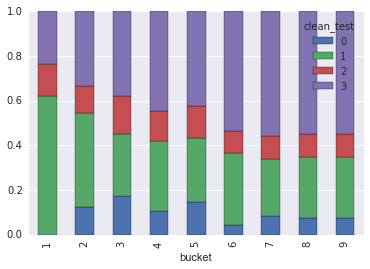

In [94]:
# NOTE TO SELF: NEED TO INVERT THE STACK ORDER
# GOOD SCORES SHOULD BE ON THE BOTTOM
movies_xt_pct.plot(kind='bar', stacked=True)

In [63]:

import matplotlib.image as mpimg

img = mpimg.imread('beta.png')
img

array([[[ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        ..., 
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647]],

       [[ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        ..., 
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647]],

       [[ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        ..., 
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94117647,  0.94117647,  0.94117647]],

       ..., 
       [[ 0.35686275,  0.36862746,  0.37254903],
        

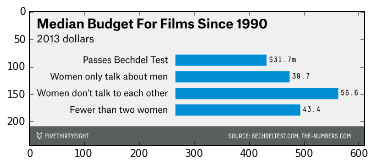

In [64]:
imgplot = plt.imshow(img)
imgplot

In [86]:
# TODO: Calculate average gross budget for each rating
# TODO: Create a sideways histogram. Or bar chart.
# TODO: No y-axis, just the titles of each rating to the right side of each bar

# Data needed: 'budget_2013$', 'clean_test'
# Filters need: films since 1990

beta = movies_df[movies_df['year'] >= 1990]
beta = beta.groupby('test').median()
beta_plot = beta['budget_2013$']
beta_plot

test
dubious             31617675.5
dubious-disagree    46364637.0
men                 38160582.5
men-disagree        45383537.5
notalk              53102348.0
notalk-disagree     67412609.0
nowomen             40311473.0
nowomen-disagree    54286580.0
ok                  29703299.0
ok-disagree         58312784.5
Name: budget_2013$, dtype: float64

test
dubious             31617675.5
dubious-disagree    46364637.0
men                 38160582.5
men-disagree        45383537.5
notalk              53102348.0
notalk-disagree     67412609.0
nowomen             40311473.0
nowomen-disagree    54286580.0
ok                  29703299.0
ok-disagree         58312784.5
Name: budget_2013$, dtype: float64

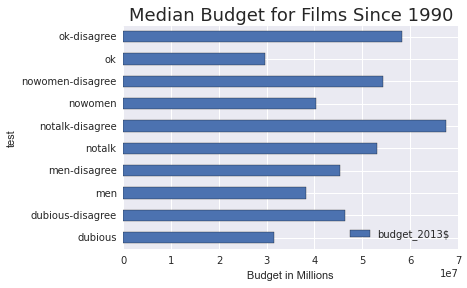

In [95]:
beta_plot.plot(kind='barh', legend=True)
plt.xlabel('Budget in Millions') # Need to divide by 1,000,000 to do this
plt.title('Median Budget for Films Since 1990', fontsize=18)
# TODO: Remove x-axis and y-axis. Replace with number values at tips of bars
beta_plot


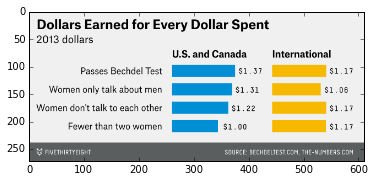

In [92]:

img = mpimg.imread('gamma.png')
plt.imshow(img)

clean_test
0    0.996369
1    1.222995
2    1.305368
3    1.370452
Name: ROI, dtype: float64


clean_test
0    1.113233
1    1.201792
2    1.238017
3    1.313735
dtype: float64

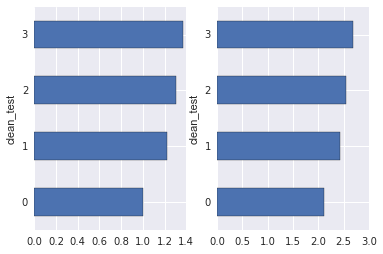

In [158]:
# TODO: Calculate dollar earned per dollar spent.
# TODO: Split by Bechdel score.
# TODO: Make a bar chart for both US/ Canada, and International

# Looks like I'll have to use two subplots
# A Figure title, and then titles for the two subplots
# Beyond that, the graphing is easy.
# Data Needed: 'domgross_2013$', 'intgross_2013$', 'clean_test'

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
movies_df['ROI'] = movies_df['domgross']/ movies_df['budget']
gamma1 = movies_df[movies_df['year'] >= 1990].groupby('clean_test').median()
gamma1['ROI'].plot(kind='barh')
print(gamma1['ROI'])

ax2 = fig.add_subplot(1, 2, 2)
movies_df['x_ROI'] = movies_df['intgross']/ movies_df['budget']
gamma2 = movies_df[movies_df['year'] >= 1990].groupby('clean_test').median()
gamma2['x_ROI'].plot(kind='barh')
gamma2['x_ROI'].subtract(gamma1['ROI'])

In [140]:
gamma1.insert()

C:\Users\Play\Anaconda3\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
